# Beleg 1: Bilddateien, Bilddarstellung und -diskretisierung, Generative Kunst

**Name:** Phuong Nguyen
<br>
**Matrikelnr.:** 587089

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Mo, 11.10.2023
<br>
**Abgabe (in der Übung zu zeigen bis spätestens):** Mo, 29.11.2023


**Hinweise zum Beleg:** 
- Die erfolgreiche Bearbeitung des Belegs ist zwingende Voraussetzung zur Teilnahme an der Klausur. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.


### Viel Erfolg!

### Aufgabe 1: Grauwertbilder

In der ersten Aufgabe werden die wesentlichen Grundlagen von Bildern behandelt. Zunächst wird ein CT Bild im PNG Format eingelesen (`ct_image.png`) und die Bildmatrix untersucht. 

**Aufgabe 1.1**: Lesen Sie das Bild ein und visualisieren/plotten Sie es mit `pyplot` aus der `matplotlib` Library.

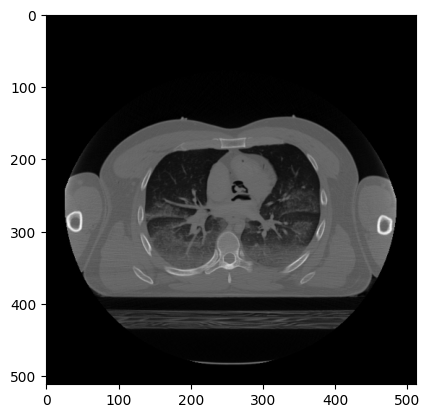

In [2]:
# 1.1
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread("ct_image.png")
plt.imshow(image, cmap = 'grey')
plt.show()


**Aufgabe 1.2**: Geben Sie die Dimensionen des Bildes (Breite und Höhe) in Pixel sowie den jeweils kleinsten und größten Wert im Bild aus.  

In [3]:
# 1.2
import numpy as np 

height, width = image.shape
print(f"Höhe des Bildes: {height} Pixel")
print(f"Länge des Bildes: {width} Pixel")
min_value = np.min(image)
print(f"Kleinster Wert des Bildes: {min_value} Pixel")
max_value = np.max(image)
print(f"Größter Wert des Bildes: {max_value} Pixel")




Höhe des Bildes: 512 Pixel
Länge des Bildes: 512 Pixel
Kleinster Wert des Bildes: 0.0 Pixel
Größter Wert des Bildes: 1.0 Pixel


**Aufgabe 1.3**: Als nächstes soll im CT Bild der schwarze Rand abgeschnitten werden, da dort keine Informationen über die aufgenommenen Strukturen zu finden sind. Zu diesem Zweck sollen Sie eine Bounding Box um den relevanten Bereich bestimmen. Dabei handelt es sich um ein Rechteck, dass sich über alle Bildbereiche erstreckt, in denen Inhalte zu finden sind (sie also nicht schwarz bzw. enthalten nicht den Wert 0). Nutzen Sie nun die gefundene Bounding Box, um das Bild entsprechend zuzuschneiden (oder auch zu "croppen").

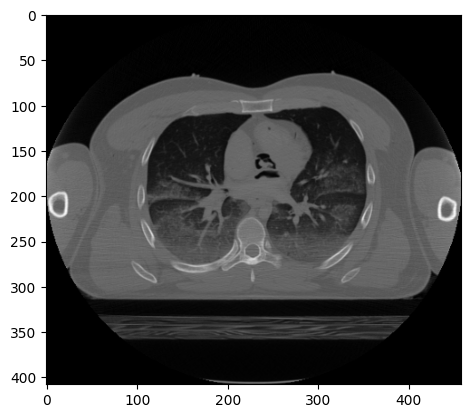

In [4]:
# 1.3
import cv2
import matplotlib.pyplot as plt

greyImage = cv2.imread("ct_image.png", cv2.IMREAD_GRAYSCALE)

yachse, xachse = np.where(greyImage > 0)
ymin = yachse.min()
ymax = yachse.max()
xmin = xachse.min()
xmax = xachse.max()

cropped_image = greyImage[ymin:ymax , xmin:xmax]
plt.imshow(cropped_image, cmap = 'grey')
plt.show()
plt.imsave("cropped_image.png", cropped_image, cmap = 'gray')









**Aufgabe 1.4**: Rotieren Sie das zugeschnittene Bild sowohl um 45° als auch um 90° und plotten Sie die rotierten Bilder.

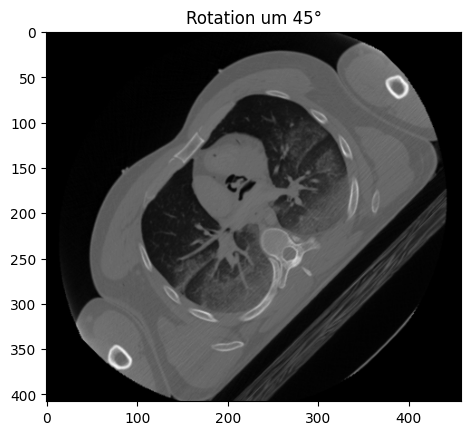

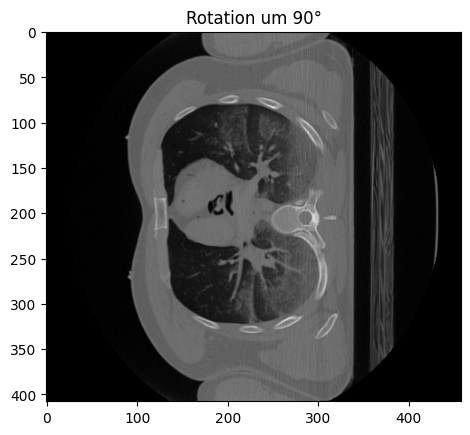

In [5]:
#1.4
# Quelle: https://www.geeksforgeeks.org/how-to-rotate-an-image-using-python/

import cv2 # importing cv 
import imutils 
import matplotlib.pyplot as plt 

# read an image as input using OpenCV 
# image = cv2.imread(r"ct_image.png") 

Rotated_image = imutils.rotate(cropped_image, angle=45) 
Rotated1_image = imutils.rotate(cropped_image, angle=90) 

# display the image using OpenCV of 
# angle 45 
plt.title("Rotation um 45°")
plt.imshow(Rotated_image, cmap = 'grey') 
plt.show()


# display the image using OpenCV of 
# angle 90 
plt.title("Rotation um 90°")
plt.imshow(Rotated1_image, cmap = 'grey') 
plt.show()







### Aufgabe 2: Farbbilder

In dieser Aufgabe werden Sie mit einem Farbbild (`mamma_tissue.png`) arbeiten. Dabei handelt es sich um eine Gewebeaufnahme einer Biopsie mit invasivem duktalem Mammakarzinom. 

**Aufgabe 2.1**: Lesen Sie das Bild sowohl mit OpenCV als auch mit Scikit-Image ein und visualisieren/plotten Sie es. Achten Sie dabei auf eine korrekte Darstellung des Bildes (zum Vergleich können Sie das Bild in einem Bildbetrachtungsprogramm Ihrer Wahl öffnen). 

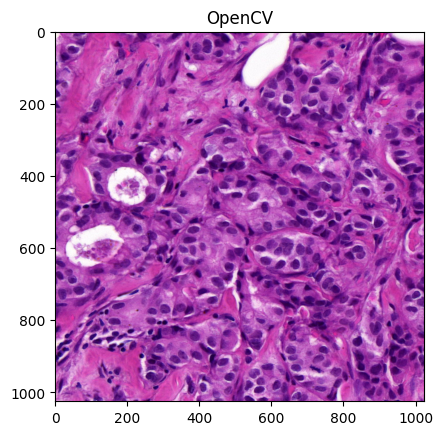

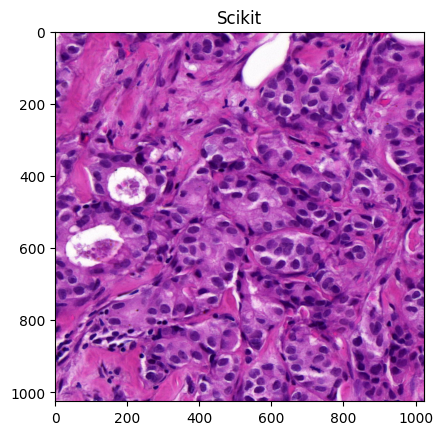

In [6]:
# 2.1
import cv2 as cv 
from skimage import io
# import matplotlib.pyplot as plt 

imagePath = "mamma_tissue.png"
image = cv.imread(imagePath)

imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
scikitImage = io.imread(imagePath)
 
plt.title("OpenCV")
plt.imshow(imageRGB)
plt.show()

plt.title("Scikit")
plt.imshow(scikitImage)
plt.show()







**Aufgabe 2.2**: Zerlegen Sie das Bild in seine einzelnen Farbkanäle für Rot, Grün und Blau. Zeigen Sie in einer gemeinsamen Grafik sowohl das Farbbild, als auch die drei einzelnen Farbkanäle.

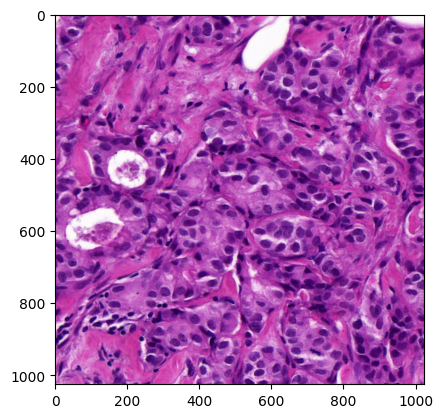

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


In [7]:
from skimage.color.rgb_colors import black
# 2.2
# Quelle: https://stackoverflow.com/questions/19181485/splitting-image-using-opencv-in-python
# https://stackoverflow.com/questions/64907237/how-to-divide-an-image-into-4-different-tones-python
# https://stackoverflow.com/questions/69213814/how-to-change-the-value-of-one-rgb-channel-in-python-with-cv2


import matplotlib.image as img
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image
import cv2

# das Farbbild
image = img.imread("mamma_tissue.png")
plt.imshow(image)
plt.show()

# Bild in einzelne Farbkanäle

import numpy as np
import cv2
#display an image
cv2.imshow('image',img)
b,g,r=cv2.split(img)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)













**Aufgabe 2.3**: Führen Sie eine Farbquantisierung (also eine Reduktion der im Bild vorkommenden Farben) auf dem Bild durch. Plotten Sie das Ergebnis mit 2, 4, 8 und 16 Farben. Sie können hierzu einen der in der Vorlesung vorgestellten Algorithmen (Median Cut und Fehlerdiffusion) verwenden. Die Abgabe wird aber auch abgenommen, wenn die Reduktion mithilfe einer der gängigen Bildverarbeitungs-Librarys durchgeführt wird.

In [ ]:
# 2.3


**Aufgabe 2.4**: Lesen Sie die Größe des Originalbildes ein und geben sie mit einer `print`-Anweisung aus. Anschließend verkleinern Sie das Bild auf 128x128 Pixel und plotten es. Schließlich skalieren Sie das verkleinerte Bild wieder auf die Originalgröße und plotten es erneut.

In [ ]:
# 2.4

**Aufgabe 2.5**: Lesen die das Bild ein und konvertieren Sie es in den HSV Raum. Setzen Sie mit hilfe des HSV Farbmodells alle Pixel auf 0, die nicht Teil eines Zellkerns sind. Beschreiben Sie dabei in einem kurzen Fließtext, was Sie sich bei Ihrer Vorgehensweise gedacht haben. 

*Hinweis: Für die Abnhame dieser Teilaufgabe wird kein perfektes Ergebnis erwartet. Viel eher sollen Sie zeigen, dass Sie das Grundprinzip des HSV Farbmodells verstanden und auf die gegebene Problemstellung anwenden können.*

In [ ]:
# 2.5

### Aufgabe 3: Generative Kunst

In dieser Aufgabe Sie auf spielerische Art Kenntnisse im Umgang mit Bilddaten in Python gewinnen, und dabei auch einen kleinen Schwenk zu den Kulturwissenschaften nehmen. Das Thema lautet: Generative Kunst. 

**Aufgabe 3.1**: Setzen Sie sich zunächst mit dem Thema auseinander. Tauchen Sie ein in die Geschichte an schauen Sie sich die verschiedenen Ansätze an. Benennen Sie dann drei verschiedene Ansätze, wobei Sie die jeweiligen Algorithmen und Möglichkeiten der Parametrisierung beschreiben.

#### Ansatz 1: 

#### Ansatz 2:

#### Ansatz 3:

**Aufgabe 3.2**: Schauen Sie sich folgenden Code zum Erzeugen einer Julia Menge an. Dies ist das Ergebnis, wenn man ChatGPT bittet, ein Python Skript für die Generierung der Julia Menge zu erzeugen. Ziemlich unübersichtlich, nicht? Experimentieren Sie ruhig ein wenig mit den Paramern, insbesondere der komplexen Zahl `c`. Im Netz sind diverse Kombinationen zu finden, mit denen verschiedene Muster der Julia-Menge generiert werden können. 

In Python können wir Funktionen mit Standardparameter versehen, so dass diese nicht immer angegeben werden müssen. Strukturieren Sie den Code neu, sodass in der Funktion `julia()` alle Parameter default-Werte haben. Der Übersichtlichkeit halber sollte auch das Plotten eine separate Funktion ausgelagert werden. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funktion zur Berechnung der Julia-Menge
def julia(c, max_iter, width, height, x_min, x_max, y_min, y_max):
    image = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            zx, zy = x_min + j / (width - 1) * (x_max - x_min), y_min + i / (height - 1) * (y_max - y_min)
            z = zx + zy * 1j
            color = mandelbrot(z, c, max_iter)
            image[i, j] = color

    return image

# Funktion zur Berechnung der Mandelbrot-Menge
def mandelbrot(z, c, max_iter):
    for i in range(max_iter):
        if abs(z) > 2.0:
            return i
        z = z * z + c
    return max_iter

# Dimensionen des Bildes (Breite und Höhe)
width, height = 1600, 1600

# Bereich des Bildes (x_min, x_max, y_min, y_max)
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5

# Maximale Anzahl von Iterationen für die Julia-Berechnung
max_iter_julia = 128

# Parameter für die Julia-Menge (c: komplexe Zahl)
c_julia = complex(-0.783, 0.138)  # Ändern Sie die Werte für verschiedene Julia-Mengen

# Julia-Menge visualisieren
julia_image = julia(c_julia, max_iter_julia, width, height, x_min, x_max, y_min, y_max)

# Visualisierung des Julia-Fraktals
plt.imshow(julia_image, cmap='gist_yarg', extent=(x_min, x_max, y_min, y_max))
plt.colorbar()
plt.title('Julia-Menge')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

**Aufgabe 3.3**: Nun sind Sie dran. Implementieren Sie einen eigenen Ansatz für generative Kunst. Experimentieren Sie mit geometrischen Formen, Zufallsgeneratoren, Farbräumen, Fraktalen und was Ihnen sonst noch einfällt. Ich empfehle Ihnen, alle Ergebnisse zu speichern (zum Beispiel in dem sie eine Plot-Funktion implementieren, die die Plots automatisch mit Zeitstempel speichert - so gibt es keine Namenskonflikte), um zu verhindern, dass sie auf der Suche nach noch besseren Parametern einen guten Versuch "verlieren".

Geben Sie einen Ihrer Versuche mit Erklärung bzw. Code des eingesetzten Algorithmus ab und finden Sie einen Titel zu Ihrem Werk. Am Ende werde ich daraus einen Sammelband aus dem laufenden Semester erzeugen und allen per Moodle zur Verfügung stellen. 

In [ ]:
# 3.3
